## **Importing Python libraries**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('processed_travel_destinations.csv')

## **Exploratory Data Analysis - EDA**

# **Step1: Visualize data**

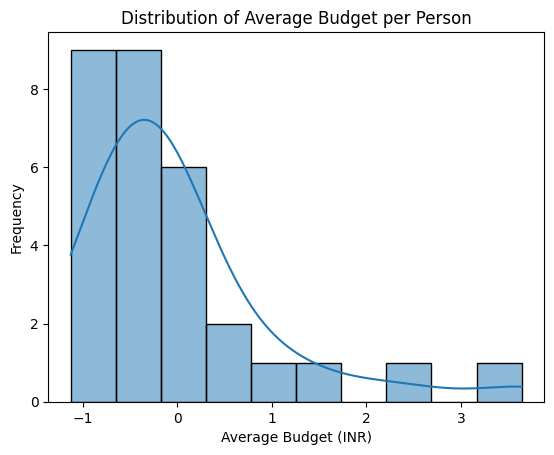

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plotting the distribution of average budgets
sns.histplot(df['Average_Budget_Per_Person(INR)'], bins=10, kde=True)
plt.title('Distribution of Average Budget per Person')
plt.xlabel('Average Budget (INR)')
plt.ylabel('Frequency')
plt.show()

## **Step2: Analyze Co-relations**

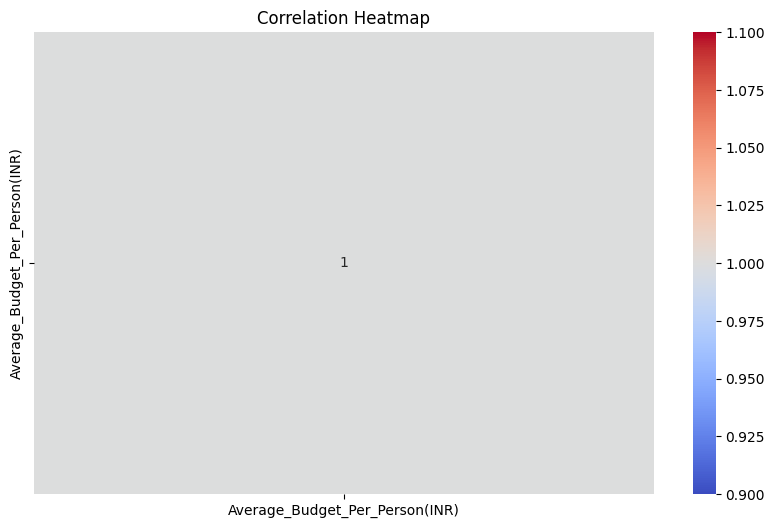

In [3]:
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Implement KNN for Recommendations**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



**Prepare the data**

In [5]:
# Check column names and structure
print(df.columns.tolist())  # Check the column names
print(df.head())            # Check the DataFrame structure

# Define features (X) and target variable (y)
# Replace 'Best_Time_to_Visit' with the correct column name if necessary
X = df[['Average_Budget_Per_Person(INR)', 'Best_Time_to_Visit']]

# Create target variable (y) based on one-hot encoded destination types
# Make sure the column names reflect the actual structure of your DataFrame
y = df[['Type_Beach', 'Type_Adventure', 'Type_Historical',
         'Type_City', 'Type_Hill Station', 'Type_Island',
         'Type_Nature', 'Type_Romantic', 'Type_Wildlife']]

# One-hot encode the 'Best_Time_to_Visit' column
X = pd.get_dummies(X, columns=['Best_Time_to_Visit'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optional: Print the shapes of your training and testing sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")





['Destination', 'Best_Time_to_Visit', 'Popular_Attractions', 'Average_Budget_Per_Person(INR)', 'Description', 'State_Andaman and Nicobar Islands', 'State_Delhi', 'State_Goa', 'State_Himachal Pradesh', 'State_Jammu and Kashmir', 'State_Karnataka', 'State_Kerala', 'State_Ladakh', 'State_Maharashtra', 'State_Meghalaya', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu', 'State_Telangana', 'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal', 'Type_Adventure', 'Type_Beach', 'Type_City', 'Type_Cultural', 'Type_Hill Station', 'Type_Historical', 'Type_Island', 'Type_Nature', 'Type_Romantic', 'Type_Wildlife']
  Destination    Best_Time_to_Visit         Popular_Attractions  \
0        Agra      October to March        Taj Mahal, Agra Fort   
1      Jaipur  November to February       Hawa Mahal, Amer Fort   
2         Goa  November to February          Beaches, Nightlife   
3         Leh      May to September  Pangong Lake, Nubra Valley   
4     Udaipur    September to March   Lak

**Train KNN model**

In [6]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**Make Predictions**

In [7]:
# Predict on the test set
predictions = knn.predict(X_test)

# Display predictions
print(predictions)


[[False False  True False False False False False False]
 [False False False False False False False False False]
 [False False  True False False False False False False]
 [False False False False False False False False False]
 [False False  True False False False False False False]
 [False False False False False False False False False]]


**Evaluate the Model**

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'KNN Model Accuracy: {accuracy:.2f}')



KNN Model Accuracy: 0.17


## **Implement Simple Linear Regression for Budget Prediction**



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Prepare Data for Linear Regression**

In [10]:
# Assume we're predicting 'Average_Budget_Per_Person' based on 'Destination_Type' and 'Season'
X_budget = df[['Type_Beach', 'Type_Adventure', 'Type_Historical',
             'Type_City', 'Type_Hill Station', 'Type_Island',
             'Type_Nature', 'Type_Romantic', 'Type_Wildlife']]  # Features
y_budget = df['Average_Budget_Per_Person(INR)']  # Target variable

# One-hot encode categorical features
#X_budget = pd.get_dummies(X_budget, columns=['Destination_Type', 'Season'], drop_first=True) # This line is causing issues with your X_budget selection,
                                                                                               # as 'Destination_Type' and 'Season' were not in your original list

# Split the data
X_budget_train, X_budget_test, y_budget_train, y_budget_test = train_test_split(X_budget, y_budget, test_size=0.2, random_state=42)

**Train the Linear Regression Model**

In [11]:
# Create Linear Regression model
lin_reg = LinearRegression()

# Fit the model on training data
lin_reg.fit(X_budget_train, y_budget_train)


LinearRegression()

**Make Predictions**

In [12]:
# Predict on the test set
budget_predictions = lin_reg.predict(X_budget_test)

# Display predictions
print(budget_predictions)


[-0.04334192 -0.69347076 -0.69347076 -0.69347076  3.64072147  0.06501288]


**Evaluate The Model**

In [13]:
   # Calculate performance metrics
   mse = mean_squared_error(y_budget_test, budget_predictions)
   r2 = r2_score(y_budget_test, budget_predictions)

   print(f'Mean Squared Error: {mse:.2f}')
   print(f'R² Score: {r2:.2f}')


Mean Squared Error: 5.07
R² Score: -2.71


## **Recommendation Code**

In [14]:
import calendar
import pandas as pd

# Load your CSV file
df = pd.read_csv('processed_travel_destinations.csv')

# Helper function to get month number from month name, handling case and whitespace
def get_month_number(month_name):
    try:
        month_name = month_name.strip().title()  # Remove spaces and standardize case
        return list(calendar.month_name).index(month_name)
    except ValueError:
        print(f"Invalid month: '{month_name}' not recognized.")
        return None

# Helper function to check if the preferred month is in the travel season range
def is_month_in_range(preferred_month, range_str):
    months = range_str.split(" to ")
    start_month = get_month_number(months[0])
    end_month = get_month_number(months[1]) if len(months) > 1 else start_month

    if start_month and end_month:
        if start_month <= end_month:
            return start_month <= preferred_month <= end_month
        else:  # Handle ranges like "Nov to Feb"
            return preferred_month >= start_month or preferred_month <= end_month
    return False

# Recommendation function
def recommend_destinations(min_budget, max_budget, time_to_visit, interest):
    # Budget filtering
    budget_filtered = df[
        (df['Average_Budget_Per_Person(INR)'] >= min_budget) &
        (df['Average_Budget_Per_Person(INR)'] <= max_budget)
    ]

    # Time filtering
    preferred_month = get_month_number(time_to_visit.split()[0])
    time_filtered = budget_filtered[budget_filtered['Best_Time_to_Visit'].apply(lambda x: is_month_in_range(preferred_month, x))]

    # Interest filtering
    interest_column = f"Type_{interest}"
    if interest_column in df.columns:
        recommendations = time_filtered[time_filtered[interest_column] == True]
    else:
        recommendations = time_filtered

    if recommendations.empty:
        return "No recommendations found."
    else:
        return recommendations[['Destination', 'Description', 'Average_Budget_Per_Person(INR)', 'Best_Time_to_Visit']]

# User input for preferences
min_budget = float(input("Enter minimum budget (lower boundary of the range): "))
max_budget = float(input("Enter maximum budget (upper boundary of the range): "))
time_to_visit = input("Enter preferred time to visit (e.g., 'November to February'): ")
interest = input("Enter interest type (e.g., 'Beach'): ")

# Get recommendations
recommendations = recommend_destinations(min_budget, max_budget, time_to_visit, interest)
print(recommendations)

Enter minimum budget (lower boundary of the range): -1
Enter maximum budget (upper boundary of the range): 4
Enter preferred time to visit (e.g., 'November to February'): November to February
Enter interest type (e.g., 'Beach'): Beach
    Destination                                        Description  \
2           Goa  goa offers beautiful beaches vibrant nightlife...   
19  Pondicherry  pondicherry coastal town french colonial archi...   

    Average_Budget_Per_Person(INR)    Best_Time_to_Visit  
2                         0.173368  November to February  
19                       -0.693471      October to March  
